In [6]:
import os
from glob import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import behaviour_functions as bhv
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [7]:
path = '/Volumes/lab-kohlj/home/shared/people/Irene/miniscope_recordings/scored/'
IDs = ['JKAA73.4c', 'JKAA80.3g']
times = ['baseline', 'day1', 'day2', 'day3', 'day4', 'day30']

In [8]:
# initialize dataframe
behaviours = pd.DataFrame(columns = ["ID", "time", "behaviour", "latency", "duration"])

# extract behaviours for each ID and each experimental time point
for ID in IDs:
    for time in times:
        # Create the file pattern for clarity
        file_pattern = f'{ID}_virgin_{time}_inscopix*.csv'
        full_pattern = path + file_pattern
        
        try:
            # get the paths for each file in dataset
            file = glob(full_pattern)
            
            if not file:  # No matching files found
                print(f"❌ MISSING FILE: No files match pattern '{file_pattern}'")
                continue
                
            print(f"✓ Processing: {file[0]}")
            df = pd.read_csv(file[0])
            
            # Check if the file has the required columns and data
            if "Behavior" not in df.columns:
                print(f"⚠️ WARNING: File {file[0]} has no 'Behavior' column")
                continue
                
            # Check if "pup intro" exists to prevent error in organise_behav_new
            if "pup intro" not in df["Behavior"].values:
                print(f"⚠️ WARNING: File {file[0]} has no 'pup intro' event")
                # You may still want to continue, or add a fix here
            
            # organise behavioural data and calculate latency and duration of behaviours
            try:
                behaviours = bhv.organise_behav_new(df, ID, time, behaviours, 'time')
                print(f"✓ Successfully processed behaviors for {ID} at {time}")
            except Exception as e:
                print(f"❌ ERROR processing {file[0]}: {str(e)}")
                
        except IndexError:
            print(f"❌ ERROR: File exists but couldn't be accessed: {full_pattern}")
            continue
        except Exception as e:
            print(f"❌ ERROR: {str(e)} when processing {full_pattern}")
            continue

# turn values in time to categorical and order them
behaviours.time = pd.Categorical(behaviours.time, categories = times, ordered = True)

print(f"\nSUMMARY: Successfully processed {len(behaviours)} behavior records")

# save behaviour dataframe as csv
# behaviours.to_csv('/Users/salgari/Documents/Documents - XJK222YYCT/GitHub/sensitization_behaviour/generated_dataset/aob_ablation_behaviours_df.csv')

✓ Processing: /Volumes/lab-kohlj/home/shared/people/Irene/miniscope_recordings/scored/JKAA73.4c_virgin_baseline_inscopix_scored.csv
✓ Successfully processed behaviors for JKAA73.4c at baseline
✓ Processing: /Volumes/lab-kohlj/home/shared/people/Irene/miniscope_recordings/scored/JKAA73.4c_virgin_day1_inscopix_scored.csv
✓ Successfully processed behaviors for JKAA73.4c at day1
✓ Processing: /Volumes/lab-kohlj/home/shared/people/Irene/miniscope_recordings/scored/JKAA73.4c_virgin_day2_inscopix_scored.csv
✓ Successfully processed behaviors for JKAA73.4c at day2
✓ Processing: /Volumes/lab-kohlj/home/shared/people/Irene/miniscope_recordings/scored/JKAA73.4c_virgin_day3_inscopix_scored.csv
✓ Successfully processed behaviors for JKAA73.4c at day3
✓ Processing: /Volumes/lab-kohlj/home/shared/people/Irene/miniscope_recordings/scored/JKAA73.4c_virgin_day4_inscopix_scored.csv
✓ Successfully processed behaviors for JKAA73.4c at day4
✓ Processing: /Volumes/lab-kohlj/home/shared/people/Irene/miniscope

In [9]:
behaviours[behaviours.behaviour == 'overall retrieval']

,ID,time,behaviour,latency,duration
5,JKAA73.4c,baseline,overall retrieval,125.7,16.7
13,JKAA73.4c,day1,overall retrieval,39.533,39.2
21,JKAA73.4c,day2,overall retrieval,25.667,47.667
29,JKAA73.4c,day3,overall retrieval,15.5,54.202
37,JKAA73.4c,day4,overall retrieval,9.334,63.665
45,JKAA73.4c,day30,overall retrieval,10.633,41.601
53,JKAA80.3g,baseline,overall retrieval,900,0
61,JKAA80.3g,day1,overall retrieval,14.334,17.4
69,JKAA80.3g,day2,overall retrieval,4.834,36.135
77,JKAA80.3g,day3,overall retrieval,6.233,43.168


In [10]:
percentages = pd.DataFrame(columns = ["time", "behaviour", "percentage"])

for time in times:
    for behaviour in behaviours.behaviour.unique():
        per_df = behaviours[(behaviours.behaviour == behaviour) & (behaviours.time == time)]
        num = per_df[per_df.duration == 0].shape[0] #animals that did not perform the behaviour
        percent = (per_df.shape[0] - num) / per_df.shape[0]
        
        percentage = {}
        percentage['time'] = time
        percentage['behaviour'] = behaviour
        percentage['percentage'] = percent
        
        percentage = pd.DataFrame(percentage, index = [0])
            
        percentages = pd.concat([percentages, percentage])
        

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_56894/4055664061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


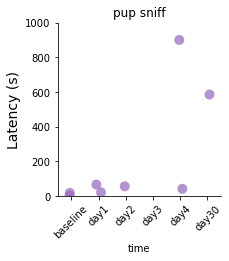

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_56894/4055664061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


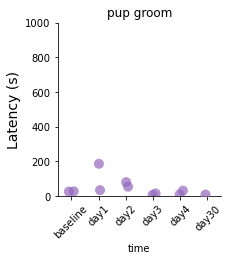

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_56894/4055664061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


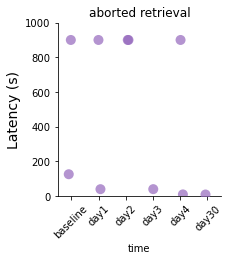

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_56894/4055664061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


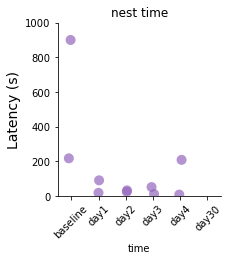

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_56894/4055664061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


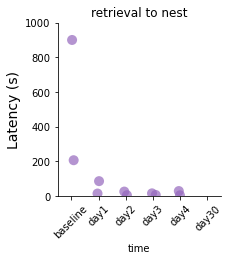

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_56894/4055664061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


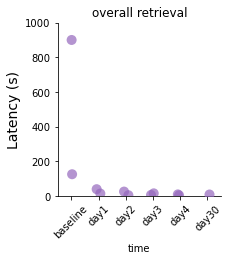

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_56894/4055664061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


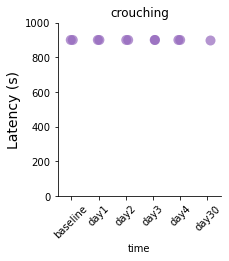

/var/folders/4g/5slcnh6x71lgn2r91zbk1pwr0000gn/T/ipykernel_56894/4055664061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  behav_df.latency = pd.to_numeric(behav_df.latency)


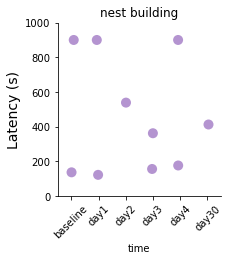

In [11]:
for behaviour in behaviours.behaviour.unique():
    behav_df = behaviours[behaviours.behaviour == behaviour]
    
    behav_df.latency = pd.to_numeric(behav_df.latency)
    # mean = behav_df.groupby(by = 'time').mean().reset_index()
    # st_error = behav_df.groupby(by = 'time').std()/np.sqrt(len(behav_df.ID.unique()))
    # st_error = st_error.reset_index()
    
    # model = smf.ols('latency ~ C(time)', data = behav_df).fit()
    # print(sm.stats.anova_lm(model, typ = 2))
    
    # m_comp = pairwise_tukeyhsd(endog=behav_df.latency, groups = behav_df.time, alpha = 0.05)
    # print(m_comp._results_table)

    
#     fig, ax = plt.subplots(figsize = [10, 5])
#     fig.tight_layout()
    
#     plt.plot(mean.time, mean.latency, color = 'purple', alpha = 0.7)
#     plt.fill_between(mean.time,  mean.latency + st_error.latency, mean.latency - st_error.latency, 
#                      color = 'purple', alpha = 0.05)
    
#     ax.set_xlim(['baseline', 'day50'])
#     ax.set_ylim([0, 900])
#     ax.spines['right'].set_visible(False)
#     ax.spines['top'].set_visible(False)
    
#     plt.xticks(fontsize = 12)
#     plt.yticks(fontsize = 12)
    
#     plt.ylabel('Latency (s)', fontsize = 14)
    
#     plt.title(behaviour)
    
#     plt.savefig(f'plots/{behaviour}_latency.jpg', dpi = 300, bbox_inches = 'tight')
#     plt.show()

    
#     fig, ax = plt.subplots(figsize = [10, 5])
#     fig.tight_layout()
    
#     sns.pointplot(mean.time, mean.latency, color = 'purple', alpha = 0.7)
#     # plt.fill_between(mean.time,  mean.latency + st_error.latency, mean.latency - st_error.latency, 
#                      # color = 'purple', alpha = 0.05)
#     ax.spines['right'].set_visible(False)
#     ax.spines['top'].set_visible(False)
    
#     plt.xticks(fontsize = 12)
#     plt.yticks(fontsize = 12)
    
#     plt.ylabel('Latency (s)', fontsize = 14)
#     plt.title(behaviour)
#     plt.show()
    
    fig, ax = plt.subplots(figsize = [3,3])
    fig.tight_layout()
    # sns.boxplot(x='time', y='latency', data = behav_df, color = 'white', width = 0.5)
    sns.stripplot(x = "time", y = "latency", data = behav_df, palette = ['Tab:purple'], alpha = 0.7, size = 10)
    # sns.barplot(x = "time", y = "latency", data = mean, palette = ["purple"], errorbar = "se", alpha = 0.3)
    # sns.lineplot(x = "time", y = "latency", data = behav_df, style = "ID", color = 'grey', alpha = 0.4, size = 7, marker = 'o', markersize=10, markerfacecolor='purple',legend = False)
    ax.set_ylim([0, 1000])
    plt.ylabel('Latency (s)', fontsize = 14)
    plt.title(behaviour)
    plt.xticks(rotation=45)
    sns.despine()

    plt.savefig(f'plots_miniscope/{behaviour}_latency.jpg', dpi = 300, bbox_inches = 'tight')
    plt.show()
    


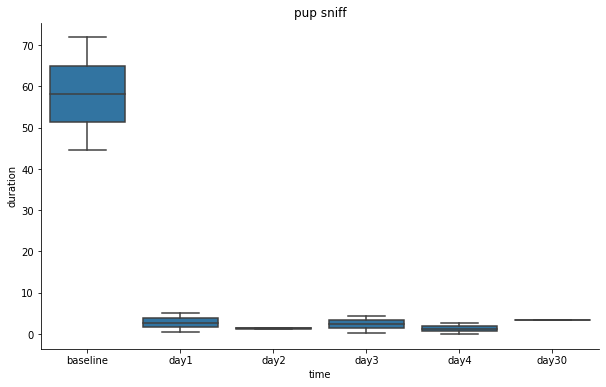

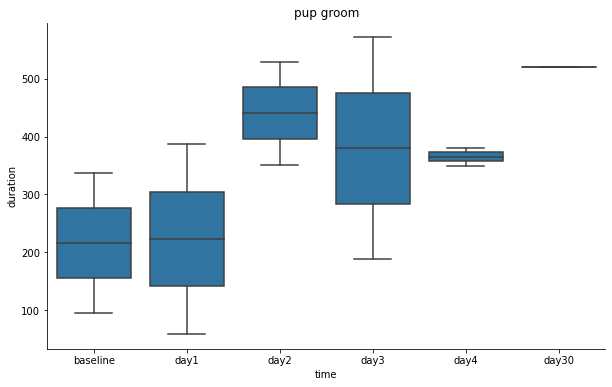

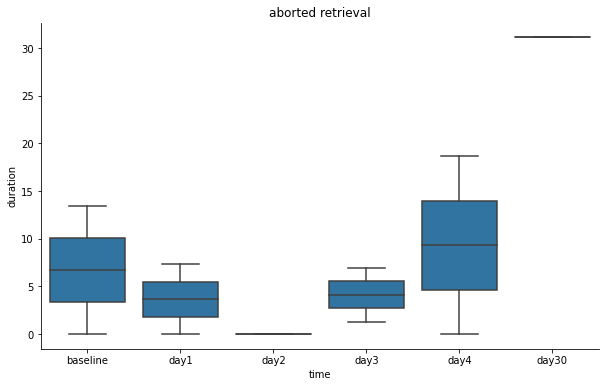

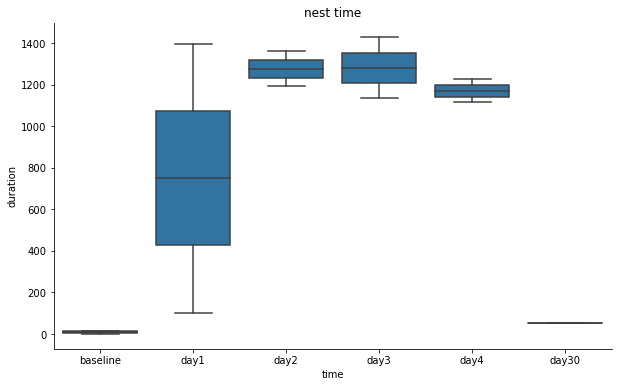

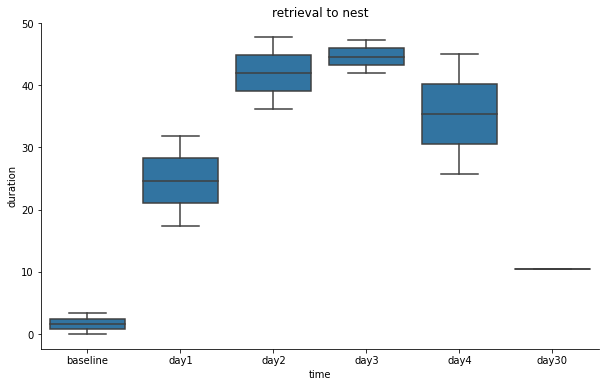

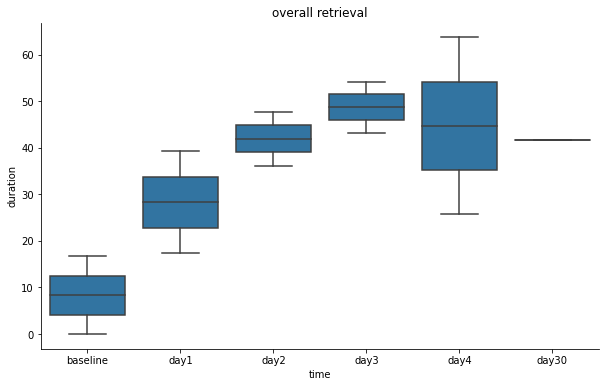

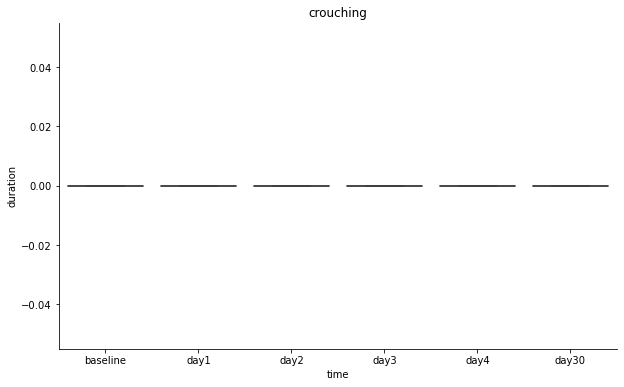

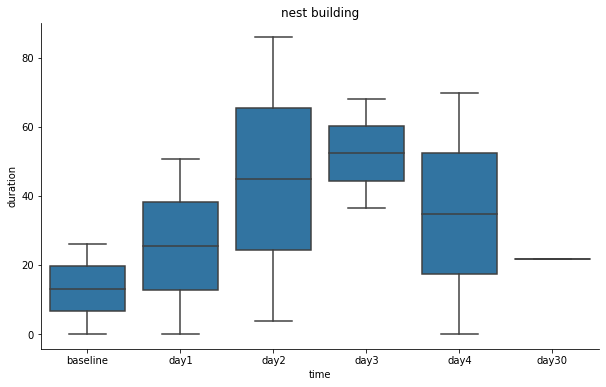

In [14]:
for behaviour in behaviours.behaviour.unique():
    behav_df = behaviours[behaviours.behaviour == behaviour]
    
    plt.subplots(figsize = [10,6])
    sns.boxplot(x = "time", y = "duration", data = behav_df, palette = ["Tab:blue"])
    plt.title(behaviour)
    sns.despine()
    # plt.savefig(f'plots_chem_mea/{behaviour}_duration.jpg', dpi = 300, bbox_inches = 'tight')
    plt.show()

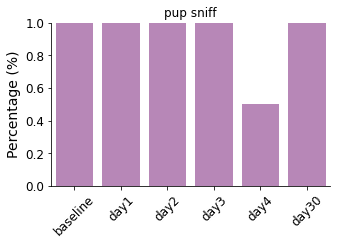

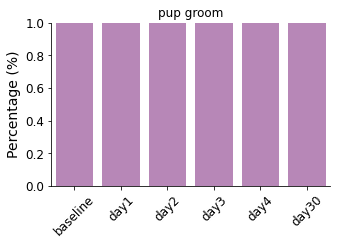

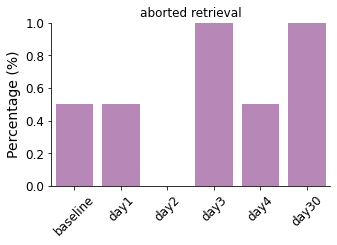

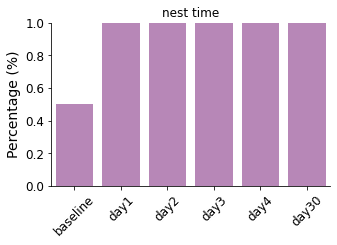

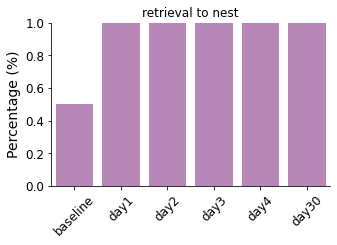

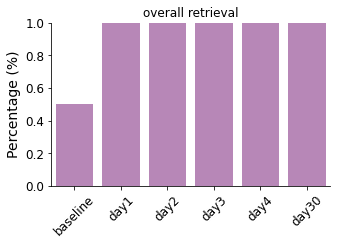

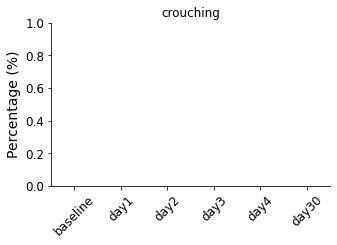

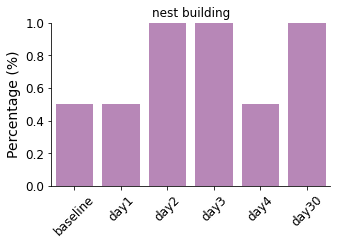

In [15]:
for behaviour in percentages.behaviour.unique():
    perc_df = percentages[percentages.behaviour == behaviour]
    
    plt.subplots(figsize = [5, 3])
    sns.barplot(x = "time", y = "percentage", data = perc_df, palette = ["purple"], alpha = 0.5)
    plt.title(behaviour)
    
    plt.ylim([0, 1])
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.xticks(rotation = 45)
    
    plt.xlabel('')
    plt.ylabel('Percentage (%)',fontsize = 14)
    
    sns.despine()
    plt.savefig(f'plots_miniscope/{behaviour}_percentage.jpg', dpi = 300)
    plt.show()